In [1]:
using Catlab

In [2]:
# copied from Catlab docs

using Catlab.WiringDiagrams

using Catlab.Graphics
import Catlab.Graphics: Graphviz

show_diagram(d::WiringDiagram) = to_graphviz(d,
  orientation=LeftToRight,
  labels=true, label_attr=:xlabel,
  node_attrs=Graphviz.Attributes(
    :fontname => "Courier",
  ),
  edge_attrs=Graphviz.Attributes(
    :fontname => "Courier",
  )
)

show_diagram (generic function with 1 method)

In [10]:
using Catlab.Doctrines

# Like FreeCategory in Catlab, but composition is unital
@syntax FreeCategory1(ObExpr,HomExpr) Category begin
  compose(f::Hom, g::Hom) = begin
        if f == id(dom(g))
            return g
        elseif g == id(codom(f))
            return f
        else
            return associate(new(f,g; strict=true)) # def. used in Catlab
        end
    end
end

# adapted from Catlab docs
A, B = [Ob(FreeCategory1.Ob, X) for X in [:A, :B]]
f = Hom(:f, A, B)

compose(id(A), f) == f

true

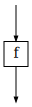

In [12]:
# copied from Catlab docs

using Catlab.Doctrines

A2, B2, C2, D2 = Ob(FreeBiproductCategory, :A2, :B2, :C2, :D2)
f2 = Hom(:f2, A2, B2)
g2 = Hom(:g2, B2, C2)
h2 = Hom(:h2, C2, D2)

f2, g2, h2 = to_wiring_diagram(f2), to_wiring_diagram(g2), to_wiring_diagram(h2)

#to_graphviz(compose(f2,g2,delete(codom(g2))))
to_graphviz(compose(f2,to_wiring_diagram(id(B2))))